# Implementation of Multiple Linear Regression using 3 ways

1. Ordinary Least Square method through Matrix operation.
2. Ordinary Least Square method from StatsModels
3. Gradient Descent Method from Scikit-Learn

## Predicting House Prices using Multiple Linear Regression

### Importing Liraries

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Loading Data

In [26]:
data = pd.read_csv("../input/home-data-for-ml-course/train.csv")

In [27]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking Correlation

In [29]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

### Input Vectors

Lets choose input vectors on the basis of correlation.

**sm.add_constant()** in following cell adds constant unit vector as a coefficient for beta0 or theta0 or intercept

In [30]:
endog = data['SalePrice']
exog = sm.add_constant(data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']])
print(exog)

      const  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0       1.0            7       2003          2003          856       856   
1       1.0            6       1976          1976         1262      1262   
2       1.0            7       2001          2002          920       920   
3       1.0            7       1915          1970          756       961   
4       1.0            8       2000          2000         1145      1145   
...     ...          ...        ...           ...          ...       ...   
1455    1.0            6       1999          2000          953       953   
1456    1.0            6       1978          1988         1542      2073   
1457    1.0            7       1941          2006         1152      1188   
1458    1.0            5       1950          1996         1078      1078   
1459    1.0            5       1965          1965         1256      1256   

      GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0          1710      

## 1.Ordinary Least Square method through Matrix operation.

Formula for parameter estimation is 

**β = (X'X)ˉ¹X'y**

Lets Convert the input and output vectors to array to implement the above formula.

### Data Preprocessing

* input vector - exog
* output vector - endog

In [31]:
X = exog.to_numpy()
y = endog.to_numpy()


Taking **transpose** of X using **np.transpose(X)**

In [32]:
xt = np.transpose(X)
print(xt)

[[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [7.000e+00 6.000e+00 7.000e+00 ... 7.000e+00 5.000e+00 5.000e+00]
 [2.003e+03 1.976e+03 2.001e+03 ... 1.941e+03 1.950e+03 1.965e+03]
 ...
 [8.000e+00 6.000e+00 6.000e+00 ... 9.000e+00 5.000e+00 6.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.480e+02 4.600e+02 6.080e+02 ... 2.520e+02 2.400e+02 2.760e+02]]


**Multiplying** xt (X Transpose) with X using **np.matmul(xt,X)**

In [33]:
xt_X = np.matmul(xt,X)
print(xt_X)

[[1.46000000e+03 8.90500000e+03 2.87805100e+06 2.89790400e+06
  1.54384700e+06 1.69743500e+06 2.21257700e+06 2.28500000e+03
  9.51600000e+03 2.58000000e+03 6.90551000e+05]
 [8.90500000e+03 5.71050000e+04 1.75890190e+07 1.76981700e+07
  9.89248600e+06 1.07246710e+07 1.41239760e+07 1.45490000e+04
  5.94430000e+04 1.66420000e+04 4.45435200e+06]
 [2.87805100e+06 1.75890190e+07 5.67474021e+09 5.71308422e+09
  3.05090344e+09 3.35090271e+09 4.36619005e+09 4.51571500e+06
  1.87654310e+07 5.10358300e+06 1.36577344e+09]
 [2.89790400e+06 1.76981700e+07 5.71308422e+09 5.75257228e+09
  3.06817533e+09 3.37197974e+09 4.39621720e+09 4.54270400e+06
  1.88973700e+07 5.13042200e+06 1.37304419e+09]
 [1.54384700e+06 9.89248600e+06 3.05090344e+09 3.06817533e+09
  1.91331187e+09 1.99770523e+09 2.49263664e+09 2.53037900e+06
  1.03595990e+07 2.93604500e+06 7.96809277e+08]
 [1.69743500e+06 1.07246710e+07 3.35090271e+09 3.37197974e+09
  1.99770523e+09 2.19153094e+09 2.74016355e+09 2.77487900e+06
  1.14389890e+07

Taking **Inverse** of xt_x using **np.linalg.inv(xt_x)**

In [34]:
xt_X_inv = np.linalg.inv(xt_X)
print(xt_X_inv)

[[ 1.15922974e+01  4.02655456e-02 -1.93944269e-03 -4.06160749e-03
   3.72993704e-05 -3.25222182e-05 -4.93290663e-05  8.01149656e-02
  -1.08299083e-02  3.62639158e-02  4.11657913e-06]
 [ 4.02655456e-02  9.84960043e-04 -9.74065790e-06 -1.25190617e-05
  -7.83657348e-07  4.42337423e-07 -1.05697829e-06 -8.05936337e-05
   5.48715552e-05 -3.34804705e-04  1.12710098e-07]
 [-1.93944269e-03 -9.74065790e-06  1.76255717e-06 -7.32449785e-07
  -2.42988222e-08  1.21469299e-08  3.05980959e-08 -2.87511476e-05
   3.16114656e-06 -1.64343121e-05 -6.69546226e-09]
 [-4.06160749e-03 -1.25190617e-05 -7.32449785e-07  2.81575949e-06
   5.87415799e-09  2.14275304e-09 -6.72521993e-10 -1.31115421e-05
   1.13724203e-06 -2.05458728e-06  4.16634079e-09]
 [ 3.72993704e-05 -7.83657348e-07 -2.42988222e-08  5.87415799e-09
   1.28299160e-08 -1.08800172e-08 -2.10639452e-11  7.72162072e-07
   2.37092470e-07  7.02679371e-07 -2.45352373e-09]
 [-3.25222182e-05  4.42337423e-07  1.21469299e-08  2.14275304e-09
  -1.08800172e-08  

**Multiplying** xt_X_inv with xt using **np.matmul(xt_X_inv,xt)**

In [35]:
xt_X_inv_xt = np.matmul(xt_X_inv,xt)
print(xt_X_inv_xt)

[[-7.78363941e-02  8.92629183e-02 -5.14323613e-02 ... -4.89221760e-02
  -8.00663356e-02 -1.86009574e-03]
 [ 1.44385781e-04 -2.42730471e-05 -2.87691719e-05 ...  3.16060580e-04
  -4.13339784e-04 -3.61326706e-04]
 [ 2.88476633e-05 -1.35992859e-05  2.08787121e-05 ... -4.49337854e-05
  -2.42308968e-05  3.11169383e-05]
 ...
 [ 8.56490977e-04 -1.15956037e-05 -1.01444610e-03 ...  2.25278082e-04
  -2.74351550e-04  2.71160064e-04]
 [-1.20426030e-03  1.60857836e-03 -1.75663399e-03 ... -1.22434946e-03
   2.57315862e-04 -5.77349920e-04]
 [ 3.61888842e-06 -4.50992051e-06  6.38658333e-06 ... -3.38132125e-06
  -3.99602562e-06 -2.45491341e-06]]


Finally getting **beta** by multiplying xt_X_inv_xt and y

In [36]:
beta = np.matmul(xt_X_inv_xt,y)
print(beta)

[-1.18619377e+06  1.96045898e+04  2.68240707e+02  2.96481161e+02
  1.98650991e+01  1.41737355e+01  5.12971178e+01 -6.79087146e+03
  3.31050771e+01  1.04179010e+04  1.49475334e+01]


## 2.Ordinary Least Square method from StatsModels

In [37]:
mod = sm.OLS(endog,exog)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:43:08   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

### Calculating Residual Standard Error

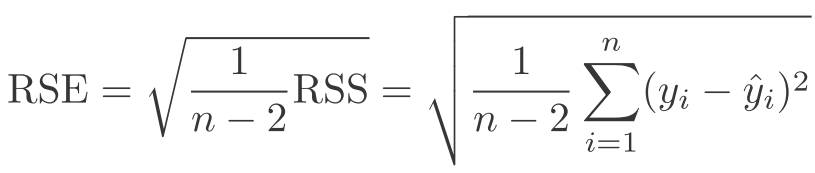

In [38]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

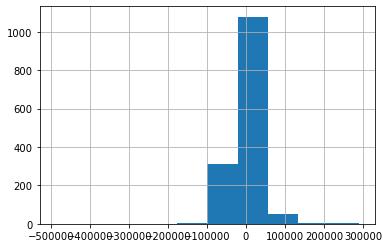

In [39]:
yp= results.predict()
ypa = np.array(yp)
yta = data['SalePrice']
eterms =yta-ypa


data1 = pd.DataFrame(eterms)
data1['SalePrice'].hist(bins=10)

In [40]:
rse= RSE(data['SalePrice'],results.predict())
print(rse)

37805.14859147039


## 3.Gradient Descent Method from Scikit-Learn

In [41]:
from sklearn import linear_model
X = data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
y = data['SalePrice']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.coef_

array([ 1.96045898e+04,  2.68240707e+02,  2.96481161e+02,  1.98650991e+01,
        1.41737355e+01,  5.12971178e+01, -6.79087146e+03,  3.31050771e+01,
        1.04179010e+04,  1.49475334e+01])

In [42]:
lm.intercept_

-1186193.766666144

### Predicting the result for test data

In [43]:
test = pd.read_csv('../input/home-data-for-ml-course/test.csv')

In [44]:
X_test = data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]


In [45]:
y_pred = lm.predict(X_test)

In [46]:
y_pred

array([214741.72468546, 169346.70949012, 220816.47032609, ...,
       227093.91227879, 126047.07735366, 136640.78777021])

I hope you liked it.